In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from keras.models import Model 

In [ ]:
from keras.layers import *

In [ ]:
x = Input(shape=(10,))

In [ ]:
hidden1 = Dense(128, activation ='relu')(x)   #two layers connected with x
hidden2 = Dense(62, activation='relu')(x) 

#create branching 
output1 = Dense(1,activation ='sigmoid')(hidden2)
output2 = Dense(5, activation = 'softmax')(hidden1)

In [ ]:
model = Model(inputs=x,outputs=[output1,output2])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 62)           682         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 128)          1408        ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 1)            63          ['dense_1[0][0]']                
                                                                                              

In [ ]:
pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


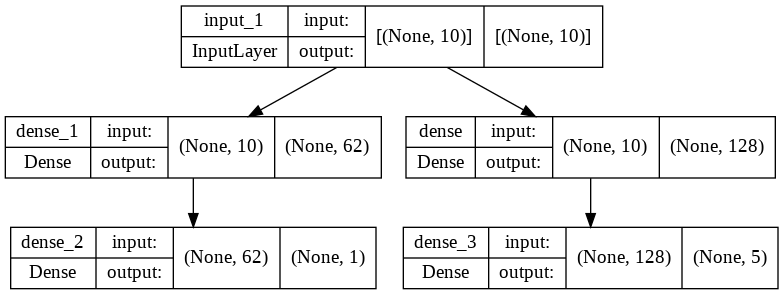

In [ ]:
from keras.utils.vis_utils import plot_model  
plot_model(model,show_shapes =True)

**Project**

**Age Gender Detection**

In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utkface-new.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#two folders in  /content/utkface_aligned_cropped....using 2nd  crop_part1 ..becuase it has less data 

In [ ]:
path = '/content/utkface_aligned_cropped/crop_part1'

In [ ]:
import os 
import cv2

In [ ]:
#in this datset age and gender are in images name... so make different lists
 #25_1_2_20161219194415803.jpg.chip.jpg    25 show age and 1 represent gender
img = [] 
age = []
gender = []

for file in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,file)) 
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))
    img.append(img_array)     

In [ ]:
#we can also use data generaters.... here we are not using ....but data generters ...is better

In [ ]:
import numpy as np 

In [ ]:
X = np.array(img)   #input
X =X[0:4890]
X.shape

(4890, 200, 200, 3)

In [ ]:
labels =[]
for i in range(len(age)//2):   #take half dataset ....
  label = [age[i], gender[i]]
  labels.append(label)

In [ ]:
y = np.array(labels)      #output

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train = X_train/255 


In [ ]:
X_test =X_test/255

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

In [ ]:
from keras.layers import *

In [ ]:
#create braches...
output = resnet.layers[-1].output  #last layer
flatten = Flatten()(output) #connected with last layer

In [ ]:
dense1 = Dense(512, activation ='relu')(flatten)
dense2 = Dense(512, activation = 'relu')(flatten)
dense3 = Dense(512, activation= 'relu')(dense1)
dense4 = Dense(512, activation = 'relu')(dense2)
output1 =Dense(1,activation ='linear')(dense3)
output2 = Dense(1,activation='sigmoid')(dense4)  

In [ ]:
from keras.models import Model

In [ ]:
model = Model(inputs = resnet.input, outputs =[output1, output2]) 

In [ ]:
from keras.utils.vis_utils import plot_model

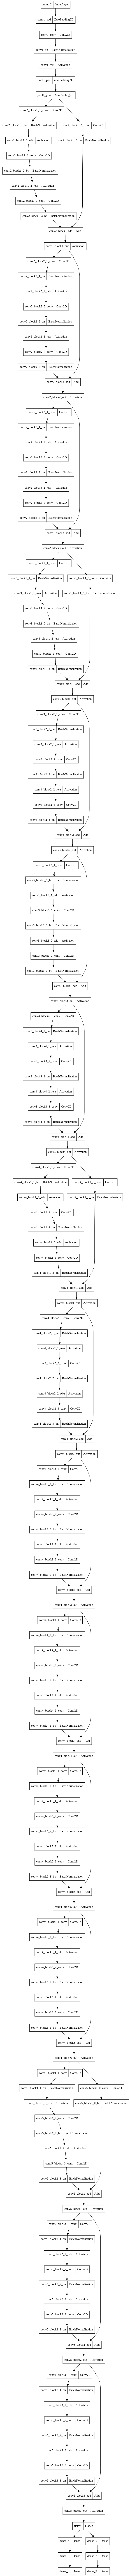

In [ ]:
plot_model(model)

In [ ]:
#now freeze all layers before flatten
for layer in resnet.layers:
  layer.trainable = False 

In [ ]:
model.compile(optimizer='Adam', loss =['mae', 'binary_crossentropy'], metrics = ['mae', 'accuracy'])

In [ ]:
#change y_train ...separate ages,gender 
y_train = [y_train[:,0], y_train[:,1]]
y_test  = [y_test[:,0], y_test[:,1]]
model.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test), batch_size =32)

In [ ]:
y_train[0]